In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [2]:
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

In [3]:
mu = np.array([0., 0.])
cov = np.array([[ 1. , 0], [0,  1]])

/home/hotohoto/playground/math_research/venv/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


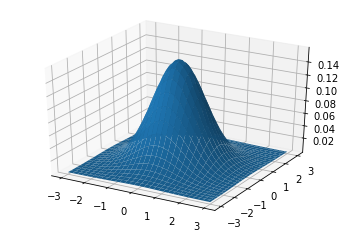

In [4]:
bv = multivariate_normal(mu, cov)
Z = bv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
fig.show()

## #1
In general, cross section of multivariate normal distribution is not proportional to its marginal distribution or its conditional distribution.

0.19947114020071635
0.07957747154594767


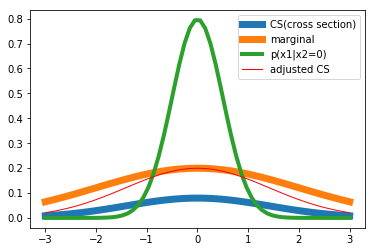

In [61]:
sigma = 2
max_uni = norm.pdf(0, 0, sigma)
print(max_uni)

mu = np.array([0., 0.])
cov = np.array([[ sigma , 0], [0,  sigma]])
bv = multivariate_normal(mu, cov)
max_bv = bv.pdf((0,0))
print(max_bv)

Y = np.zeros(N)
pos = np.column_stack((X,Y))
plt.plot(X, bv.pdf(pos), label='CS(cross section)', linewidth=7 )

N = 60
X = np.linspace(-3, 3, N)
plt.plot(X, norm.pdf(X, 0, sigma), label="marginal", linewidth=7)

plt.plot(X, norm.pdf(X, 0, 1/sigma), label="p(x1|x2=0)", linewidth=4)

plt.plot(X, (max_unistd/max_bvstd)*bv.pdf(pos), label='adjusted CS', color='red', linewidth=1)
plt.legend()
plt.show()

## #2
If standard deviation term sigma is 1, its marginal distribution and its conditional distribution are the same.

0.3989422804014327
0.15915494309189535


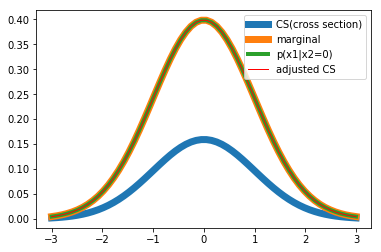

In [60]:
sigma = 1
max_uni = norm.pdf(0, 0, sigma)
print(max_uni)

mu = np.array([0., 0.])
cov = np.array([[ sigma , 0], [0,  sigma]])
bv = multivariate_normal(mu, cov)
max_bv = bv.pdf((0,0))
print(max_bv)

Y = np.zeros(N)
pos = np.column_stack((X,Y))
plt.plot(X, bv.pdf(pos), label='CS(cross section)', linewidth=7 )

N = 60
X = np.linspace(-3, 3, N)
plt.plot(X, norm.pdf(X, 0, sigma), label="marginal", linewidth=7)

plt.plot(X, norm.pdf(X, 0, 1/sigma), label="p(x1|x2=0)", linewidth=4)

plt.plot(X, (max_unistd/max_bvstd)*bv.pdf(pos), label='adjusted CS', color='red', linewidth=1)
plt.legend()
plt.show()

## #3
The maximum values of pdf converges to 0 as the the dimension goes high.

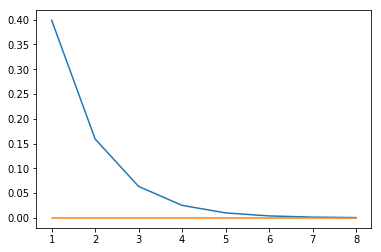

In [84]:
N = 8
def get_maximum(n):
    mu = np.zeros(n)
    cov = np.identity(n)
    mv = multivariate_normal(mu, cov)
    return mv.pdf(mu)
X = np.arange(N) + 1
Y = np.array([get_maximum(x) for x in X])

plt.plot(X, Y)
plt.plot(X, np.zeros(N))
plt.show()